# [CMI-SleepState-Detection](https://www.kaggle.com/competitions/child-mind-institute-detect-sleep-states/overview)
## Child Mind Institute - Detect Sleep States
### Detect sleep onset and wake from wrist-worn accelerometer data
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- License: Private, Unlicensed, All the files in this repository under any branch are Prohibited to be used commercially or for personally, communally or privately unless permitted by author in writing.
- Copyrights 2023-2024 (c) are reserved only by the author: Najeeb Haider Zaidi
________________________________________________________________________
# Attributions:
The Dataset has been provided by Child Mind Institute. in [Kaggle Competition](https://www.kaggle.com/competitions/child-mind-institute-detect-sleep-states/overview) which the author is participating in and authorized to use the dataset solely for the competition purposes.
________________________________________________________________________

This file explores the data around the event change.
________________________________________________________________________
### [Open in Kaggle](https://www.kaggle.com/najeebz/visualization-exploration-around-event-change)

In [12]:
!pip install pandarallel

In [13]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from pandarallel import pandarallel
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime as dts
pd.set_option('display.max_row', 500)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from tqdm import tqdm
tqdm.pandas()
pandarallel.initialize(progress_bar=True)


/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet
/kaggle/input/child-mind-institute-detect-sleep-states/sample_submission.csv
/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv
/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet
INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## In order to squeez processin 12hrs window, parallel processing will help.

# Reading the train series 

In [14]:
df=pd.read_parquet(path="/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet")

# Reading the Train Events.

### As per the dataset description both work together.
- Train series is the series of the datasteps, timestamp, enmo and anglez for multiple serieses.
- Train event describes which step triggered an event wakeup/onset.

### Steps:
- Target one shall be the merger of the two. in a single dataframe. So each recorded step should have status in it whether the subject was sleeping or awake.
- In addition to that we need to workout the timestamps. either change them to the unix style and/or change these to the datetime column.
- Once done we can figure out the correlation between the colums to identify the training features, for that we might want to take a random dataframe out of the series, So we can have a look at it quickly.


In [17]:
train_events=pd.read_csv("/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv")

### Function to convert the time to unix timestamp

In [18]:
#'2018-08-14T15:30:00-0400'
#"2022-04-07T08:53:42.06717+02:00"
def tscv(dt):
    d=dts.strptime(dt, "%Y-%m-%dT%H:%M:%S%z")
    #d = dts.fromisoformat(dt)
    ts=dts.timestamp(d)
    #print('=', end ="")
    return ts

In [19]:
#df['ts']=df['timestamp'].parallel_apply(lambda x: tscv(x))
#df.sort_values(by=['series_id', 'ts','step'])
#df.to_parquet('df_mod.parquet')


## Investigating around onset event

In [20]:
df.index[(df['series_id']=='038441c925bb') & (df['timestamp']=="2018-08-14T22:26:00-0400")]

Index([4992], dtype='int64')

In [21]:
df['anglez'][df['step']==1]

1             2.636800
389881       29.374399
1114021     -52.183800
1511281       0.679300
2148841     -86.876404
2549701       2.690400
2992141      16.707899
3770821     -34.181801
4211101       0.073100
4467961     -27.766800
4838221      10.813500
5443381     -76.774902
5828041     -67.327202
6232861     -24.153900
6643981     -16.320299
7216921      47.057598
7579801     -87.070000
8095681     -82.638000
8362441     -86.151398
8765461     -87.803802
9176401     -50.946400
9568801      88.202499
10313281    -56.864799
10915201      1.767800
11339281    -87.478996
11921221    -83.493500
12345841    -88.632401
12896281     28.131001
13448521     69.154602
13833001    -12.560900
14311801    -82.419800
14740921    -16.133400
15127381    -87.137199
15733621    -15.538300
16229161     -1.600400
16783741     88.177696
17172001    -80.277000
17287381    -89.368797
17891281      5.331700
18426241    -86.218300
19009441     -3.492900
19401301    -19.168699
20075941    -86.449402
20714941   

In [27]:
print("Mean enmo before Event: ",df['enmo'].loc[0:4992].mean())
print("Mean enmo between Events: ",df['enmo'].loc[4992:10932].mean())
print('Time start: ', df['timestamp'].loc[4992]," Time End: ",df['timestamp'].loc[10932] )
print("Total Time Difference in hrs: ", (pd.to_datetime(df['timestamp'].loc[10932]) - pd.to_datetime(df['timestamp'].loc[4992])))

Mean enmo before Event:  0.05630563
Mean enmo between Events:  0.01075366
Time start:  2018-08-14T22:26:00-0400  Time End:  2018-08-15T06:41:00-0400
Total Time Difference in hrs:  0 days 08:15:00


In [28]:
print(df.loc[(4992-50):(4992+50)])

         series_id  step                 timestamp     anglez    enmo
4942  038441c925bb  4942  2018-08-14T22:21:50-0400 -34.077801  0.0011
4943  038441c925bb  4943  2018-08-14T22:21:55-0400 -33.305199  0.0008
4944  038441c925bb  4944  2018-08-14T22:22:00-0400 -32.158001  0.0029
4945  038441c925bb  4945  2018-08-14T22:22:05-0400 -31.564501  0.0032
4946  038441c925bb  4946  2018-08-14T22:22:10-0400 -30.303699  0.0030
4947  038441c925bb  4947  2018-08-14T22:22:15-0400 -28.724199  0.0028
4948  038441c925bb  4948  2018-08-14T22:22:20-0400 -28.379601  0.0009
4949  038441c925bb  4949  2018-08-14T22:22:25-0400 -28.398001  0.0006
4950  038441c925bb  4950  2018-08-14T22:22:30-0400 -30.009899  0.0067
4951  038441c925bb  4951  2018-08-14T22:22:35-0400 -33.668499  0.0042
4952  038441c925bb  4952  2018-08-14T22:22:40-0400 -33.095100  0.0017
4953  038441c925bb  4953  2018-08-14T22:22:45-0400 -32.048401  0.0043
4954  038441c925bb  4954  2018-08-14T22:22:50-0400 -32.873299  0.0020
4955  038441c925bb  

## Investigating around wakeup event

In [37]:
df['anglez'][(df['series_id']=='038441c925bb') & (df['timestamp']=="2018-08-15T06:41:00-0400")] #wakeup event recorded precisely at this time

10932   -61.578201
Name: anglez, dtype: float32

In [33]:
px.line(x=df['step'].loc[10932-50:10932+50], y=df['anglez'].loc[10932-50:10932+50])

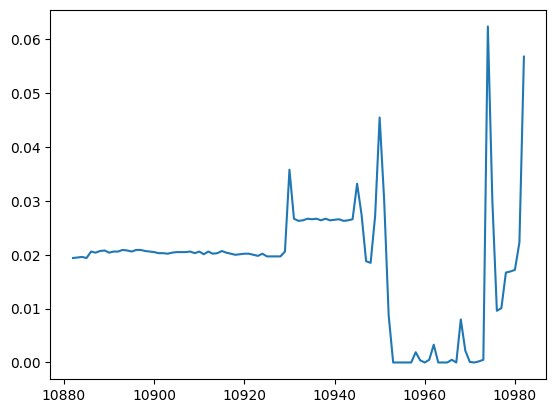

In [34]:
plt.plot(df['step'].loc[10932-50:10932+50], df['enmo'].loc[10932-50:10932+50])

## Separating the events colums to merge with series.

In [38]:
#train_events['step'][train_events['step'].isna()==False]=train_events['step'][train_events['step'].isna()==False].astype(int)
#train_events['step'].isnull().sum()
#train_events_p=train_events.dropna()
events=train_events[['series_id', 'step','event']]




### Merging the two dataframes

In [39]:
m_df=pd.merge(df,events,on=["step","series_id"],how='left')

In [41]:
m_df.head()

,series_id,step,timestamp,anglez,enmo,event
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217,NaN
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215,NaN
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216,NaN
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213,NaN
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215,NaN


In [42]:
#df=pd.read_pickle('/kaggle/input/later-data/full_clustered .pkl')

## Creating another column sleep for classification of the steps.

### Filling sleep =1 and wakeup=0 for the column

## Between onset and wakeup status, the subject should be sleeping.

### That will leave first 4991 values nan, so filling these with 0.0

In [43]:
m_df['sleep']=np.nan
m_df.loc[m_df["event"]=="onset", "sleep"] = 1
m_df.loc[m_df["event"]=="wakeup", "sleep"] = 0
m_df['sleep'].fillna(method='ffill', inplace=True)
m_df['sleep'].fillna(value=0.0, inplace=True)
m_df['sleep'].mean()

0.23334304052777124

In [44]:
m_df.loc[4900:5000]

,series_id,step,timestamp,anglez,enmo,event,sleep
4900,038441c925bb,4900,2018-08-14T22:18:20-0400,5.124200,0.0190,NaN,0.0
4901,038441c925bb,4901,2018-08-14T22:18:25-0400,-9.344100,0.0229,NaN,0.0
4902,038441c925bb,4902,2018-08-14T22:18:30-0400,-13.267100,0.0266,NaN,0.0
4903,038441c925bb,4903,2018-08-14T22:18:35-0400,-16.087099,0.0964,NaN,0.0
4904,038441c925bb,4904,2018-08-14T22:18:40-0400,-5.701600,0.1252,NaN,0.0
4905,038441c925bb,4905,2018-08-14T22:18:45-0400,-25.132000,0.0027,NaN,0.0
4906,038441c925bb,4906,2018-08-14T22:18:50-0400,-29.636600,0.0768,NaN,0.0
4907,038441c925bb,4907,2018-08-14T22:18:55-0400,-26.088800,0.0531,NaN,0.0
4908,038441c925bb,4908,2018-08-14T22:19:00-0400,-42.843300,0.1290,NaN,0.0
4909,038441c925bb,4909,2018-08-14T22:19:05-0400,-27.984600,0.2360,NaN,0.0


In [45]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
 5   event      object 
 6   sleep      float64
dtypes: float32(2), float64(1), object(3), uint32(1)
memory usage: 5.2+ GB


In [46]:
m_df[['step','enmo','sleep','anglez']].corr()


,step,enmo,sleep,anglez
step,1.000000,-0.008999,-0.124045,0.013566
enmo,-0.008999,1.000000,-0.183461,0.029586
sleep,-0.124045,-0.183461,1.000000,-0.020582
anglez,0.013566,0.029586,-0.020582,1.000000


In [51]:
train_data=m_df[['series_id','step','enmo','timestamp','sleep','anglez']].iloc[:2000000,:]
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   enmo       float32
 3   timestamp  object 
 4   sleep      float64
 5   anglez     float32
dtypes: float32(2), float64(1), object(2), uint32(1)
memory usage: 68.7+ MB


In [52]:
figure= px.imshow(train_data[['step','enmo','sleep','anglez']].corr(), text_auto=True, width=1200, height=1200)
figure.show()

In [53]:
figure= px.imshow(m_df[['step','enmo','sleep','anglez']].corr(), text_auto=True, width=1200, height=1200)
figure.show()

In [ ]:
train_data['timestamp']=train_data['timestamp'].parallel_apply(lambda x: pd.to_datetime(x))

In [ ]:
train_data

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df['step'][df['series_id']=='038441c925bb'], y=df['enmo'][df['series_id']=='038441c925bb'], name="ENMO"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=df['step'][df['series_id']=='038441c925bb'], y=df['onset'][df['series_id']=='038441c925bb'], name="Onset"),
    secondary_y=True,
)
fig.show()